In [20]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
conn = pyodbc.connect(
    'Driver={SQL Server};'
    'Server=NTB-DLZN712\SQLEXPRESS;'
    'Database=Projekt_1;'
    'Trusted_Connection=yes;'
)

In [22]:
sql_query_shipments = """SELECT [Číslo zásilky], [Datum zpracování] FROM zasilky"""
df_shipments = pd.read_sql(sql_query_shipments, conn)
sql_query_working_days = """SELECT * FROM [Seznam pracovních dnů]"""
df_working_days = pd.read_sql(sql_query_working_days, conn)

c:\Users\hcerna\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\hcerna\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [24]:
df_shipments = df_shipments.rename(columns={'Číslo zásilky': 'Shipments_no', 'Datum zpracování': 'Processing_date'})
df_shipments = df_shipments.groupby('Processing_date')[['Shipments_no']].count().reset_index()
df_shipments['Month/day'] = df_shipments['Processing_date'].dt.strftime('%m/%d')
df_shipments = df_shipments.groupby('Month/day')[['Shipments_no']].mean().round(2).reset_index()


In [25]:
year = 2022
df_working_days['Year'] = pd.DatetimeIndex(df_working_days['Datum']).year
df_working_days['Month/day'] = df_working_days['Datum'].dt.strftime('%m/%d')
df_working_days['Week_no'] = df_working_days['Datum'].dt.isocalendar().week
df_wd_year = df_working_days[(df_working_days['Year'] == year)]

In [26]:
df_final_day = pd.merge(df_wd_year, df_shipments, on=['Month/day'])
df_final_day

,Datum,Year,Month/day,Week_no,Shipments_no
0,2022-01-03,2022,01/03,1,261.00
1,2022-01-04,2022,01/04,1,320.00
2,2022-01-05,2022,01/05,1,213.33
3,2022-01-06,2022,01/06,1,425.67
4,2022-01-07,2022,01/07,1,401.33
...,...,...,...,...,...
246,2022-12-22,2022,12/22,51,73.33
247,2022-12-23,2022,12/23,51,54.00
248,2022-12-27,2022,12/27,52,30.00
249,2022-12-28,2022,12/28,52,29.00


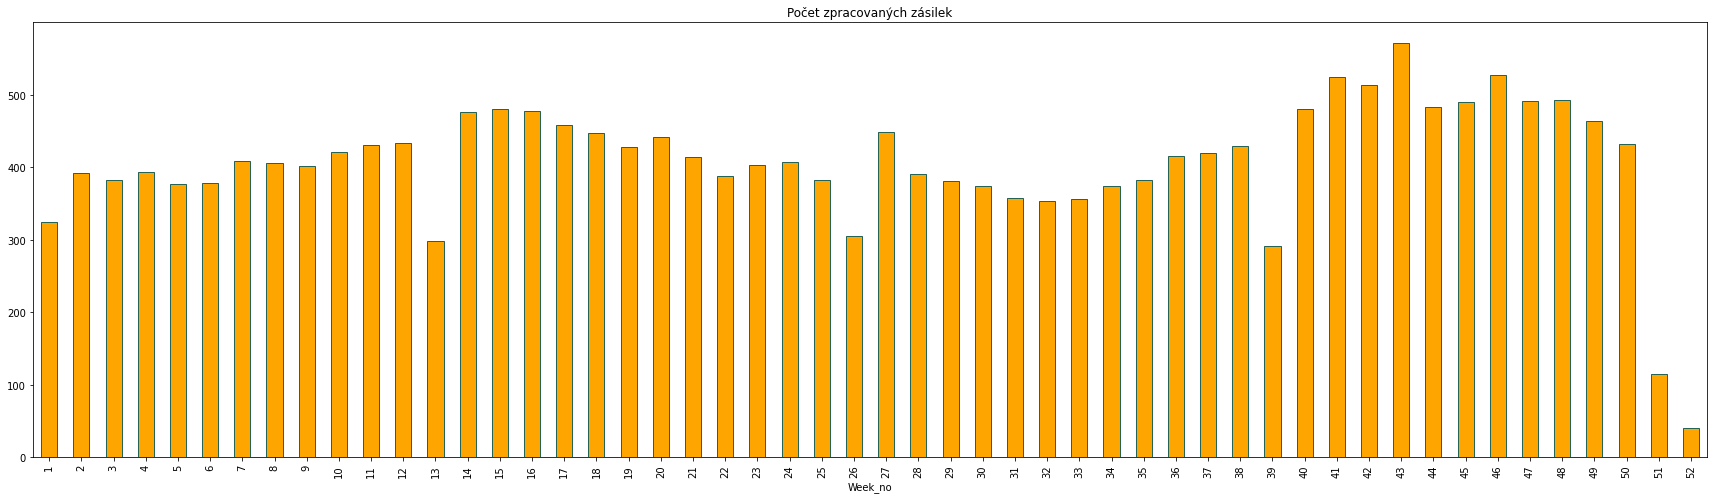

In [27]:
df_final_week = df_final_day.groupby('Week_no')[['Shipments_no']].mean().round(2)
df_final_week['Shipments_no'].plot.bar(
    figsize=(30,8),
    color="orange",
    edgecolor="#256354",
    title="Počet zpracovaných zásilek"

);

In [57]:
list_day = df_final_day.reset_index().values.tolist()
list_week = df_final_week.reset_index().values.tolist()